In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


#loading data

dataset=load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# Data Cleanup

df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list:ast.literal_eval(skill_list)if pd.notna(skill_list) else skill_list)


c:\Users\Pratyaksh\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import seaborn as sns

In [2]:
df_da_us= df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

In [5]:
df_plot=df_da_us['job_location'].value_counts().head(10).to_frame()

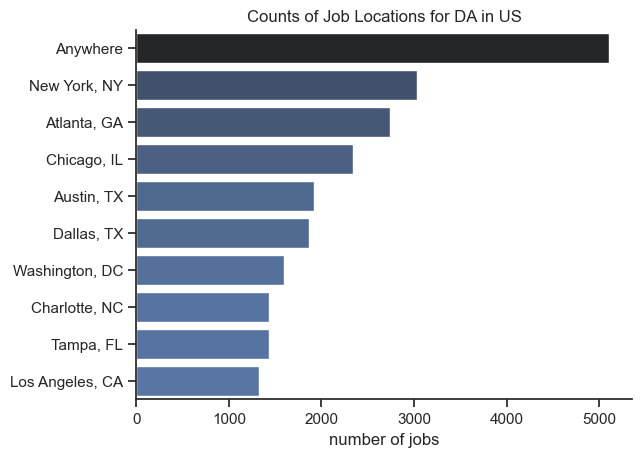

In [14]:
sns.set_theme(style='ticks')

sns.barplot(data=df_plot,x='count',y='job_location',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Counts of Job Locations for DA in US')
plt.xlabel('number of jobs')
plt.ylabel("")
plt.show()


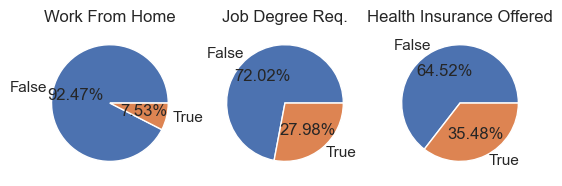

In [15]:
fig , ax = plt.subplots(1,3)
dict_column={
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'

}

for i,(column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_da_us[column].value_counts(),autopct='%1.2f%%',labels=['False','True'])
    ax[i].set_title(title)


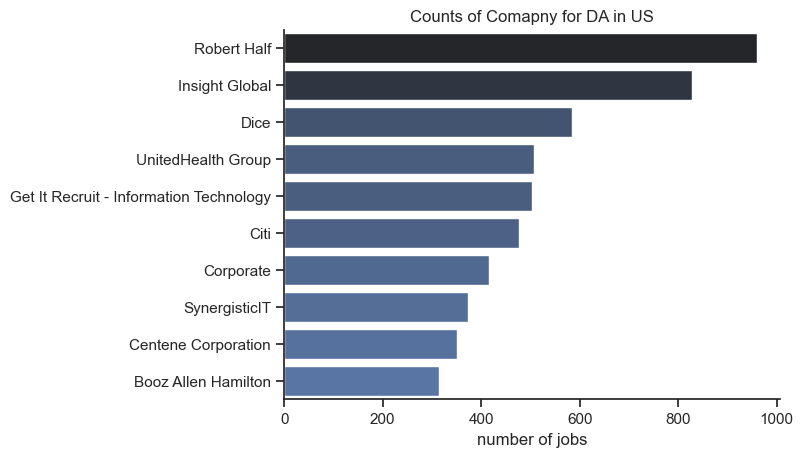

In [17]:
df_plot_company=df_da_us['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')

sns.barplot(data=df_plot_company,x='count',y='company_name',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Counts of Comapny for DA in US')
plt.xlabel('number of jobs')
plt.ylabel("")
plt.show()
